<a href="https://colab.research.google.com/github/GiselePicech/ProcesamientoPesquero/blob/main/Pesquera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerías

In [ ]:
from sklearn.utils.fixes import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import autocorrelation_plot
import datetime as dt
from datetime import datetime
import statsmodels as sm 
import statsmodels.api as sm_api

## Base de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ingesta de datos
pesca2 = pd.read_excel('/content/drive/MyDrive/SMyS/maestro_produccion_total.xlsx')

In [ ]:
#Muestra de datos
pesca2.head()

,Fecha,RInt,Dueño2,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,IAC,KGT,Rinde
0,2022-07-22,5504.0,17.0,Almeja,Almeja entera fresca,41.0,46.8,1918.8,0.0,1918.8,Almeja 1/2 valva IQF,1432.0,842.0,0.4388
1,2022-08-12,5549.0,10.0,Almeja,Almeja entera fresca,53.0,48.8,2586.4,0.0,2586.4,Almeja 1/2 valva IQF,1438.0,216.0,0.0835
2,2022-05-01,5331.0,6.0,Almeja,Almeja entera fresca,10.0,45.0,450.0,0.0,450.0,Almeja entera fresca,1.0,450.0,1.0000
3,2022-03-28,5240.0,14.0,Almeja,Almeja entera fresca,4.0,40.0,160.0,0.0,160.0,Almeja entera fresca,1.0,160.0,1.0000
4,2022-04-07,5262.0,11.0,Almeja,Almeja entera fresca,7.0,40.0,280.0,0.0,280.0,Almeja entera fresca,1.0,280.0,1.0000


In [ ]:
#Tipos de datos
pesca2.dtypes

Fecha                datetime64[ns]
RInt                        float64
Dueño2                      float64
Especie2                     object
Materia Prima                object
Cajones                     float64
PesoXcajon                  float64
KgBr                        float64
Desp                        float64
KgN                         float64
ProductoTerminado            object
IAC                         float64
KGT                         float64
Rinde                       float64
dtype: object

In [ ]:
#Cantidad de registros y columnas
pesca2.shape

(4118, 14)

In [ ]:
pesca1 = pesca2.drop("RInt", axis=1)

In [ ]:
pesca = pesca1.drop("IAC", axis=1)

In [ ]:
#Cantidad de registros y columnas
pesca.shape

(4118, 12)

In [ ]:
#Medidas generales
pesca.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Fecha,Dueño2,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,KGT,Rinde
count,4118,4118.000000,4118,4118,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118,4118.000000,4118.000000
unique,920,NaN,33,102,NaN,NaN,NaN,NaN,NaN,228,NaN,NaN
top,2021-08-01 00:00:00,NaN,Langostino,Langostino entero fresco,NaN,NaN,NaN,NaN,NaN,Vieira callo IQF,NaN,NaN
freq,23,NaN,1883,1766,NaN,NaN,NaN,NaN,NaN,470,NaN,NaN
first,2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-09-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,22.594949,NaN,NaN,201.985673,22.862285,3961.977734,0.044529,3888.203497,NaN,914.492865,0.376811
std,NaN,14.509755,NaN,NaN,233.504160,7.959118,4330.330733,0.085727,4349.494952,NaN,1258.111659,0.339411
min,NaN,1.000000,NaN,NaN,1.000000,4.000000,4.000000,0.000000,4.000000,NaN,3.200000,0.000800
25%,NaN,10.000000,NaN,NaN,31.000000,17.402500,800.200000,0.000000,722.400000,NaN,180.000000,0.146300


In [ ]:
#Control de valores nulos
pesca.isna().sum()

Fecha                0
Dueño2               0
Especie2             0
Materia Prima        0
Cajones              0
PesoXcajon           0
KgBr                 0
Desp                 0
KgN                  0
ProductoTerminado    0
KGT                  0
Rinde                0
dtype: int64

In [ ]:
#Cantidad de valores unicos por rango
pesca.nunique()

Fecha                 920
Dueño2                 54
Especie2               33
Materia Prima         102
Cajones               474
PesoXcajon            659
KgBr                 2057
Desp                   50
KgN                  2299
ProductoTerminado     228
KGT                  1184
Rinde                2657
dtype: int64

In [ ]:
#Matriz de correlacion - Metodo Pearson
pesca_df2=pd.DataFrame(pesca)
pesca_df2.corr(method = 'pearson')

,Dueño2,Cajones,PesoXcajon,KgBr,Desp,KgN,KGT,Rinde
Dueño2,1.000000,0.629361,-0.319703,0.600767,-0.336103,0.607751,0.355961,-0.258479
Cajones,0.629361,1.000000,-0.352995,0.970215,-0.325306,0.972422,0.583397,-0.364579
PesoXcajon,-0.319703,-0.352995,1.000000,-0.227727,0.529348,-0.245478,-0.160218,-0.055068
KgBr,0.600767,0.970215,-0.227727,1.000000,-0.276000,0.999087,0.608381,-0.379767
Desp,-0.336103,-0.325306,0.529348,-0.276000,1.000000,-0.308554,-0.231481,-0.146714
KgN,0.607751,0.972422,-0.245478,0.999087,-0.308554,1.000000,0.609900,-0.373076
KGT,0.355961,0.583397,-0.160218,0.608381,-0.231481,0.609900,1.000000,0.116096
Rinde,-0.258479,-0.364579,-0.055068,-0.379767,-0.146714,-0.373076,0.116096,1.000000


## Gráficos

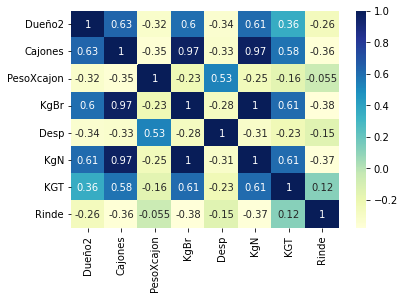

In [ ]:
#Matriz de correlacion - Metodo Pearson VISUALIZACION

sns.heatmap(pesca.corr(), annot=True, cmap="YlGnBu")
plt.show()

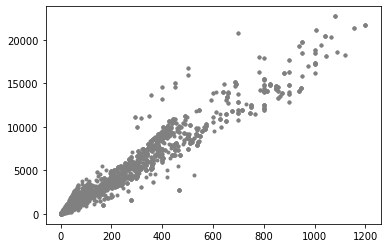

In [ ]:
#Grafico de puntos - Cantidad de cajones vs. Kg Netos
plt.scatter(pesca.Cajones , pesca.KgN, marker=".",facecolor='gray')
plt.show()

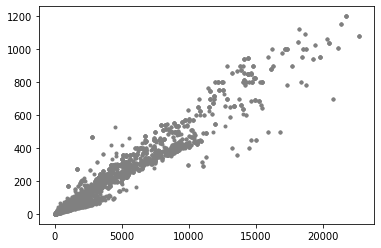

In [ ]:
#Grafico de puntos - KG Brutos vs. Cantidad de Cajones
plt.scatter(pesca.KgBr ,pesca.Cajones, marker=".",facecolor='gray')
plt.show()

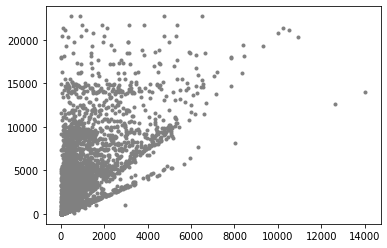

In [ ]:
#Grafico de puntos - KG Terminados vs. Kg Netos
plt.scatter(pesca.KGT,pesca.KgN, marker=".",facecolor='gray')
plt.show()

In [ ]:
#Suma de Rinde por Dueno
pesca[['Dueño2','Rinde']].groupby('Dueño2').sum().sort_values('Rinde', ascending=False)

,Rinde
Dueño2,
10.0,482.4379
43.0,148.0787
18.0,123.9163
16.0,103.3410
6.0,99.0986
34.0,75.7509
19.0,45.4919
30.0,41.3943
5.0,38.8312


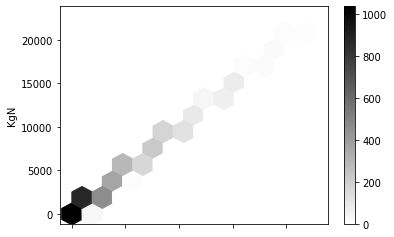

In [ ]:
#Grafico de hexagonos - KG Brutos vs. Kg Netos
pesca.plot.hexbin(x='KgBr', y='KgN', gridsize=12,cmap="gist_yarg")
plt.show()

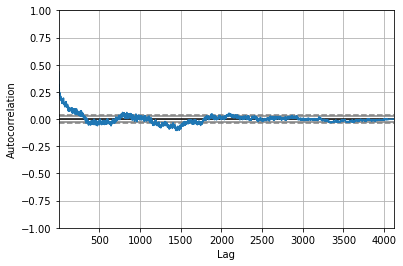

In [ ]:
#Grafico de Autocorrelacion - Desperdicio

autocorrelation_plot(pesca.Desp)
plt.show()

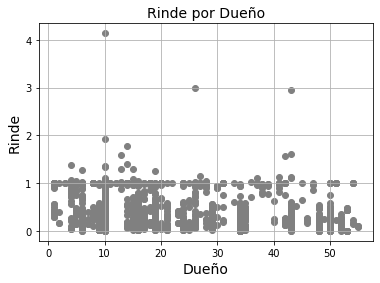

In [ ]:
#Grafico de puntos - Duenos vs. Rinde
df = pd.DataFrame(pesca,columns=['Dueño2','Rinde'])
plt.scatter(df['Dueño2'], df['Rinde'], color='grey', marker='o')
plt.title('Rinde por Dueño', fontsize=14)
plt.xlabel('Dueño', fontsize=14)
plt.ylabel('Rinde', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
sns.set()

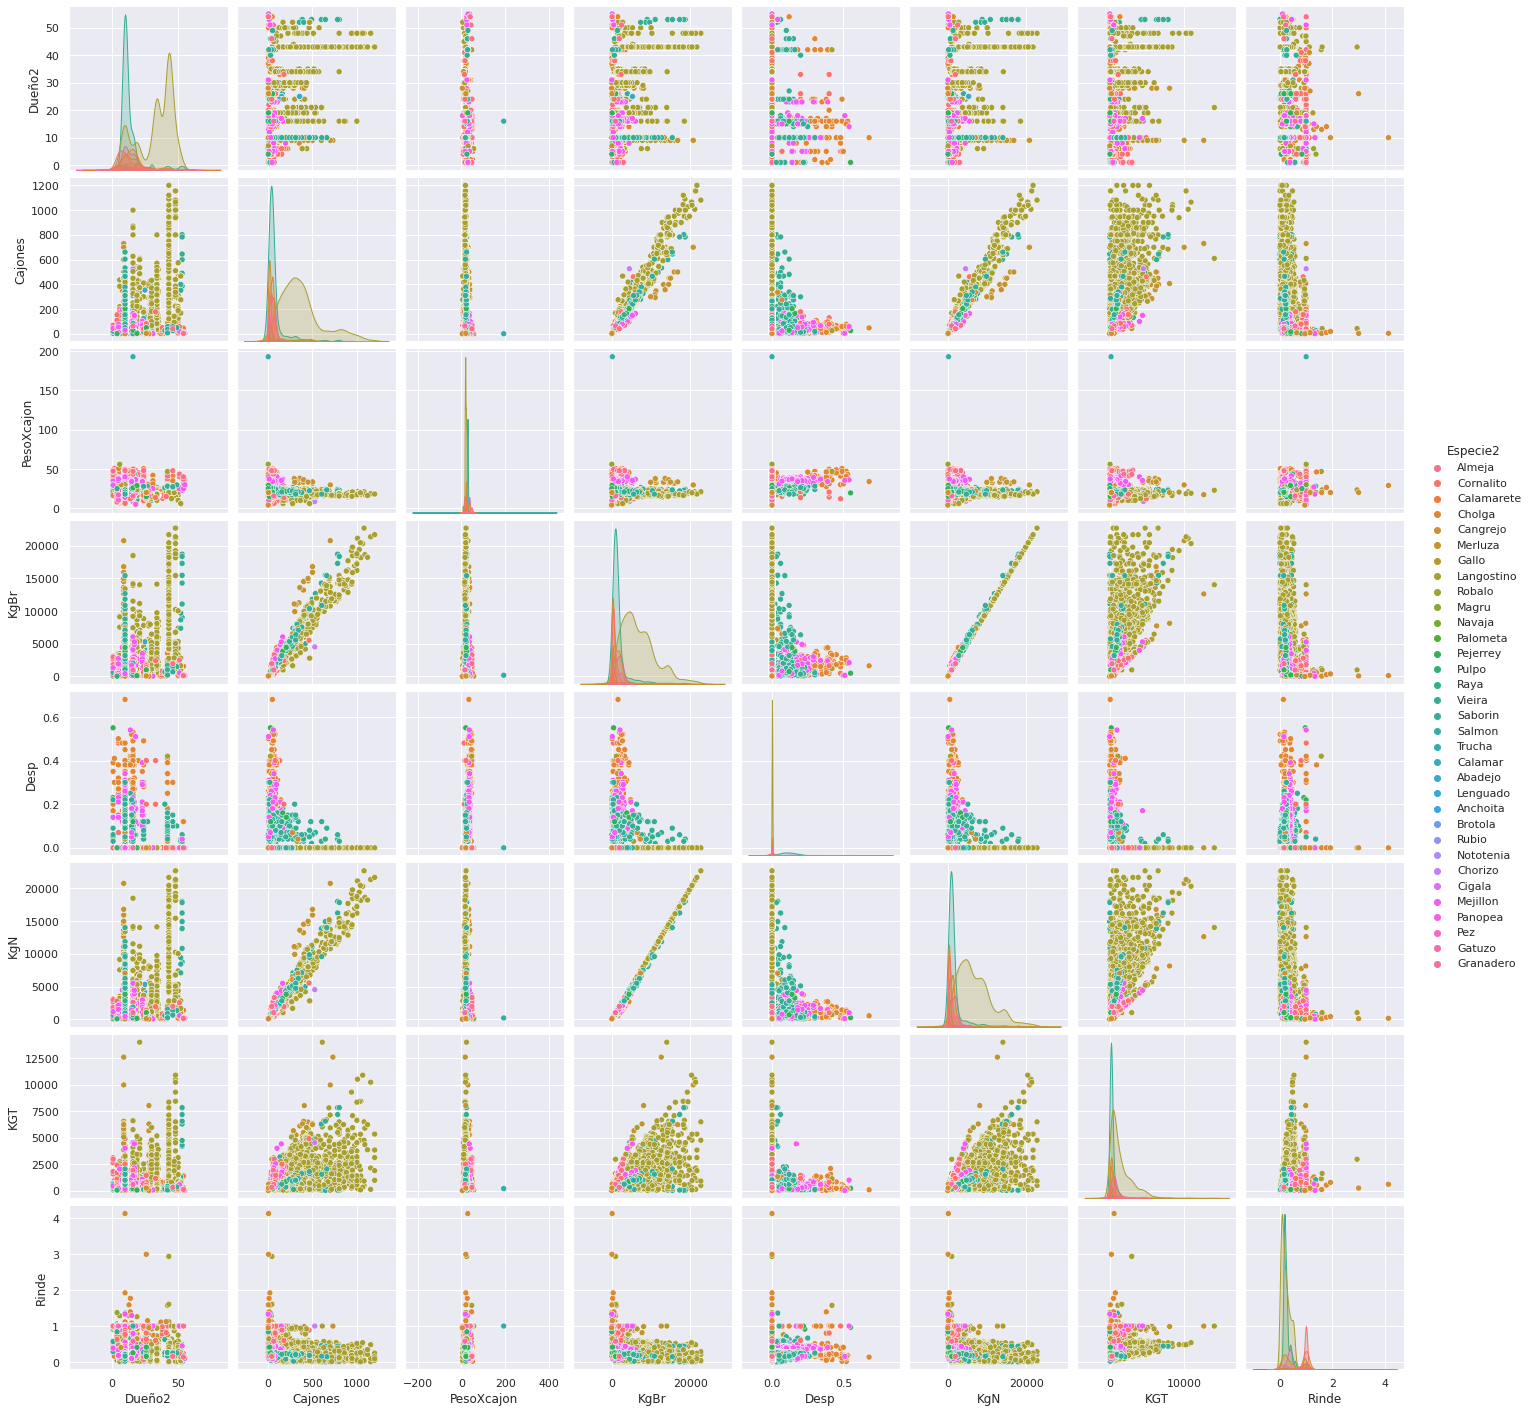

In [ ]:
sns.pairplot(pesca, hue="Especie2")
plt.show()

## Selección de datos

In [ ]:
especies = pesca[['Especie2','KGT']].groupby('Especie2').sum().sort_values('KGT',ascending=False)

In [ ]:
#Filtro las especies por ranking de SumKGT > 10.000
dfEspecies = pd.DataFrame(especies)
especies_maxpesos = dfEspecies['KGT']>=10000
filtro_dfEspecies = dfEspecies[especies_maxpesos]
print(filtro_dfEspecies)

                   KGT
Especie2              
Langostino  2709476.18
Vieira       313694.20
Mejillon     157711.98
Merluza      157613.20
Cornalito    142021.00
Cholga       112852.45
Cangrejo      63803.91
Almeja        48419.70
Pejerrey      15325.00
Abadejo       10012.00


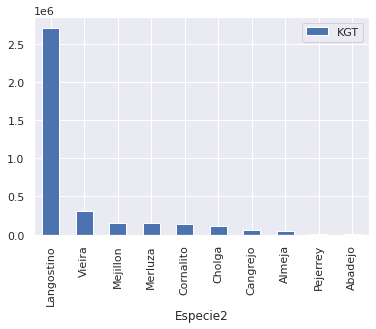

In [ ]:
filtro_dfEspecies.plot(kind='bar')

In [ ]:
especiesB = pesca[['Especie2','Rinde']].groupby('Especie2').sum().sort_values('Rinde',ascending=False)

In [ ]:
#Filtro las especies por ranking de SumRinde > 20
dfEspeciesB = pd.DataFrame(especiesB)
especiesB_maxrinde = dfEspeciesB['Rinde']>=20
filtro_dfEspeciesB = dfEspeciesB[especiesB_maxrinde]
print(filtro_dfEspeciesB)

               Rinde
Especie2            
Langostino  456.6039
Vieira      219.6476
Cornalito   206.6070
Cangrejo    193.6871
Mejillon    121.9721
Cholga      116.8206
Almeja       49.1189
Merluza      43.0657
Pejerrey     42.3364


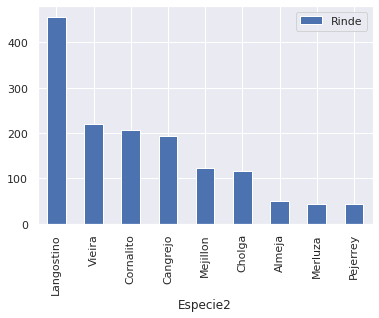

In [ ]:
filtro_dfEspeciesB.plot(kind='bar')

In [ ]:
#Creo tabla con especies Top 9 que SumRinde > 20 y SumKGT > 10.000
filtro_dfEspecies = pd.DataFrame(filtro_dfEspecies)
filtro_dfEspeciesB = pd.DataFrame(filtro_dfEspeciesB)
especiesAB = pd.merge(left = filtro_dfEspecies, right = filtro_dfEspeciesB, how = 'inner', left_on = 'Especie2', right_on = 'Especie2')
DFespeciesAB = pd.DataFrame(especiesAB)
especiesAB

,KGT,Rinde
Especie2,,
Langostino,2709476.18,456.6039
Vieira,313694.20,219.6476
Mejillon,157711.98,121.9721
Merluza,157613.20,43.0657
Cornalito,142021.00,206.6070
Cholga,112852.45,116.8206
Cangrejo,63803.91,193.6871
Almeja,48419.70,49.1189
Pejerrey,15325.00,42.3364


In [ ]:
especiesKN = pesca[['Especie2','KgN']].groupby('Especie2').sum().sort_values('KgN',ascending=False)

In [ ]:
#Filtro las especies por ranking de SumKgN > 50.000
dfEspeciesKN = pd.DataFrame(especiesKN)
especies_maxpesosKN = dfEspeciesKN['KgN']>=50000
filtro_dfEspeciesKN = dfEspeciesKN[especies_maxpesosKN]
print(filtro_dfEspeciesKN)

                   KgN
Especie2              
Langostino  12898832.6
Vieira       1434869.3
Merluza       469856.4
Mejillon      352755.2
Cholga        300321.6
Cornalito     153069.8
Almeja        150586.7
Cangrejo       74390.6
Abadejo        61884.7


In [ ]:
#Creo tabla con especies Top 9 que SumRinde > 20, SumKGT > 10.000 y SumKgN > 50.000
filtro_dfEspeciesKN = pd.DataFrame(filtro_dfEspeciesKN)
especiesABKN = pd.merge(left = DFespeciesAB, right = filtro_dfEspeciesKN, how = 'inner', left_on = 'Especie2', right_on = 'Especie2')
DFespeciesABKN = pd.DataFrame(especiesABKN)
especiesABKN

,KGT,Rinde,KgN
Especie2,,,
Langostino,2709476.18,456.6039,12898832.6
Vieira,313694.20,219.6476,1434869.3
Mejillon,157711.98,121.9721,352755.2
Merluza,157613.20,43.0657,469856.4
Cornalito,142021.00,206.6070,153069.8
Cholga,112852.45,116.8206,300321.6
Cangrejo,63803.91,193.6871,74390.6
Almeja,48419.70,49.1189,150586.7


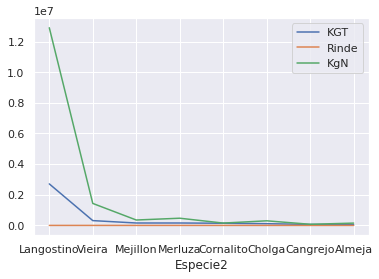

In [ ]:
especiesABKN.plot()

In [ ]:
#Filtro las base por especies (9) que SumKGT > 10.000 y SumRinde > 20
especies_top = especiesAB.index
filtro_TopEsp = pesca_df2[pesca_df2['Especie2'].isin(especies_top)]
filtro_TopEsp.head()

,Fecha,Dueño2,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,KGT,Rinde
0,2022-07-22,17.0,Almeja,Almeja entera fresca,41.0,46.8,1918.8,0.0,1918.8,Almeja 1/2 valva IQF,842.0,0.4388
1,2022-08-12,10.0,Almeja,Almeja entera fresca,53.0,48.8,2586.4,0.0,2586.4,Almeja 1/2 valva IQF,216.0,0.0835
2,2022-05-01,6.0,Almeja,Almeja entera fresca,10.0,45.0,450.0,0.0,450.0,Almeja entera fresca,450.0,1.0000
3,2022-03-28,14.0,Almeja,Almeja entera fresca,4.0,40.0,160.0,0.0,160.0,Almeja entera fresca,160.0,1.0000
4,2022-04-07,11.0,Almeja,Almeja entera fresca,7.0,40.0,280.0,0.0,280.0,Almeja entera fresca,280.0,1.0000


In [ ]:
filtro_TopEsp.shape

(3971, 12)

In [ ]:
#Fitro de Especie "LANGOSTINO"
filtro_Lang = pesca_df2[pesca_df2['Especie2']=='Langostino']
filtro_Lang.head()

,Fecha,Dueño2,Especie2,Materia Prima,Cajones,PesoXcajon,KgBr,Desp,KgN,ProductoTerminado,KGT,Rinde
276,2021-06-17,10.0,Langostino,Langostino entero fresco,229.0,18.00,4122.00,0.0,4122.0,Lg. C1 block,516.0,0.1252
277,2022-01-13,21.0,Langostino,Langostino entero fresco,381.0,16.40,6248.40,0.0,6248.4,Lg. C1 block,3366.0,0.5387
278,2022-01-13,9.0,Langostino,Langostino entero fresco,300.0,18.25,5475.00,0.0,5475.0,Lg. C1 block,2106.0,0.3847
279,2022-01-13,19.0,Langostino,Langostino entero fresco,249.0,18.25,4544.25,0.0,4544.3,Lg. C1 block,1854.0,0.4080
280,2022-01-13,21.0,Langostino,Langostino entero fresco,421.0,16.88,7106.48,0.0,7106.5,Lg. C1 block,4230.0,0.5952


In [ ]:
filtro_Lang.shape

(1883, 12)

In [ ]:
langostino9 = filtro_Lang.drop("Dueño2", axis=1)
langostino8 = langostino9.drop("Especie2", axis=1)
langostino7 = langostino8.drop("Materia Prima", axis=1)
langostino6 = langostino7.drop("Cajones", axis=1)
langostino5 = langostino6.drop("PesoXcajon", axis=1)
langostino4 = langostino5.drop("KgBr", axis=1)
langostino3 = langostino4.drop("Desp", axis=1)
langostino2 = langostino3.drop("ProductoTerminado", axis=1)
langostino1 = langostino2.drop("KGT", axis=1)
langostino = langostino1.drop("Rinde", axis=1)
langostino.head()

,Fecha,KgN
276,2021-06-17,4122.0
277,2022-01-13,6248.4
278,2022-01-13,5475.0
279,2022-01-13,4544.3
280,2022-01-13,7106.5


In [ ]:
dfLangostino = pd.DataFrame(langostino)
dfLangostino.dtypes

Fecha    datetime64[ns]
KgN             float64
dtype: object

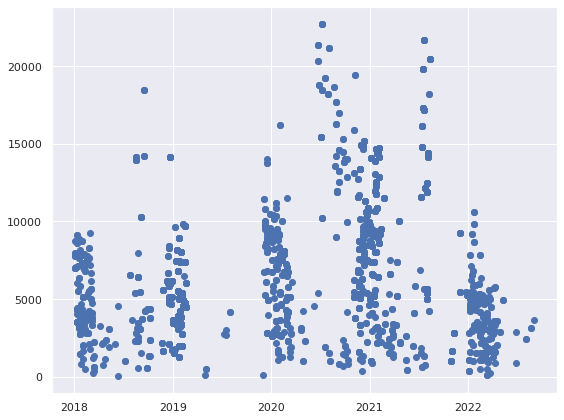

In [ ]:
x1 = dfLangostino['Fecha']
y1 = dfLangostino['KgN']
plt.plot_date(x1, y1)
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.show()

# **SERIE** **TEMPORAL**

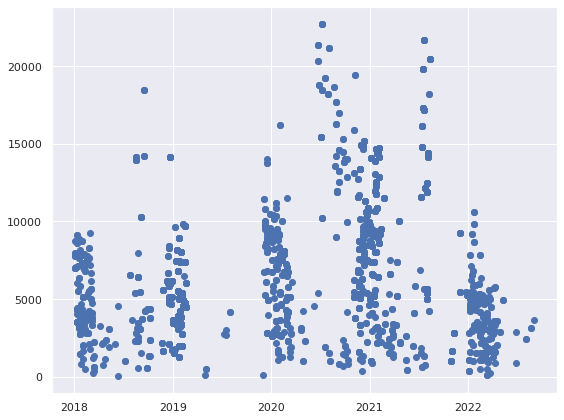

In [ ]:
#Visualización de la serie temporal
serie = dfLangostino['KgN'].squeeze()
#serie.plot()
xS = dfLangostino['Fecha']
yS = serie
plt.plot_date(xS, yS)
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.show()

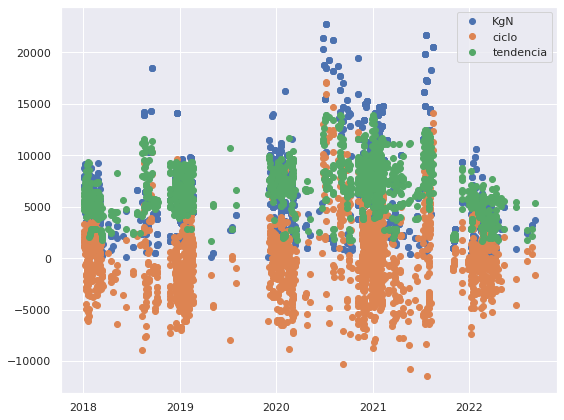

In [ ]:
#Filtro de Hodrick-Prescott para la separación de variables
ciclo, tendencia = sm_api.tsa.filters.hpfilter(serie)
dfLangostino['ciclo'] = ciclo
dfLangostino['tendencia'] = tendencia
yV = dfLangostino[['KgN','ciclo','tendencia']]
plt.plot_date(xS, yV)
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.legend(yV)
plt.show()

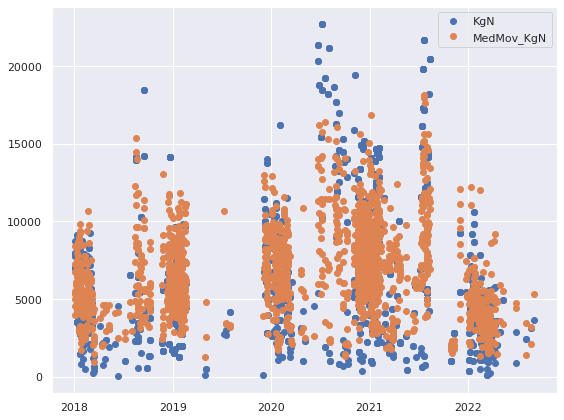

In [ ]:
#Calculo de la media móvil
MedMov_KgN = serie.rolling(window=5).mean()
dfLangostino['MedMov_KgN'] = MedMov_KgN
yMV = dfLangostino[['KgN','MedMov_KgN']]
plt.plot_date(xS, yMV)
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.legend(yMV)
plt.show()

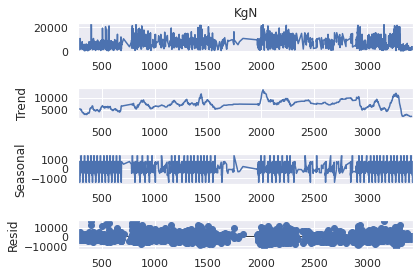

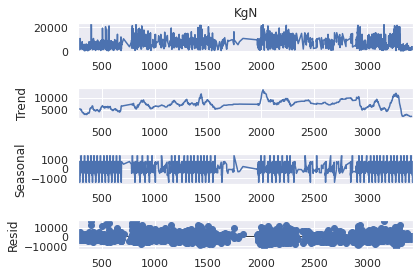

In [ ]:
#Descomposición
descomp = sm_api.tsa.seasonal_decompose(serie, model='additive',period=30)
descomp.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ign

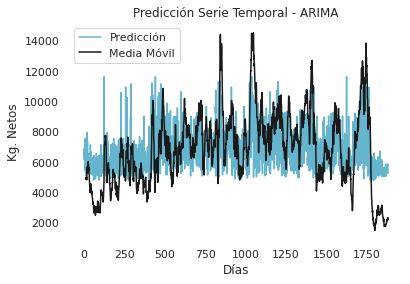

In [ ]:
# ARIMA
serie = dfLangostino['KgN']

serie.index = pd.DatetimeIndex(dfLangostino['Fecha']).to_period("D")
modelo = sm.tsa.arima_model.ARIMA(serie.iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
pronostico = np.array(resultados.fittedvalues)

MedMov_datos = serie.rolling(window=14).mean()
datos = np.array(MedMov_datos)

plt.plot(pronostico,c='c', label='Predicción')
plt.plot(datos,c='k',label='Media Móvil')
plt.xlabel("Días")
plt.ylabel("Kg. Netos")
plt.legend(facecolor="white")
plt.title("Predicción Serie Temporal - ARIMA")
plt.grid(False)
ax = plt.axes()
ax.set_facecolor("w")
plt.show()